In [2]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt


In [4]:
geoData = gpd.read_file('world.clean.json')
GW1 = pd.read_csv("GermanwatchCRI_2019.clean.csv", index_col=0)
GW2 = pd.read_csv("GermanwatchCRI_2000_2019.clean.csv", index_col=0)
pop = pd.read_csv('population.clean.csv', index_col=0)
gdp = pd.read_csv('gdp.clean.csv', index_col=0)

In [11]:
plotData = geoData.merge(pop, left_on=['Alpha‑3-code'], right_on=['Alpha‑3-code'])
plotData = plotData.merge(gdp, left_on=['Alpha‑3-code'], right_on=['Alpha‑3-code'])

for i in range(1960,2023):
    y = str(i)
    plotData['GDP_per_capita_'+y] = plotData["WorldBank_"+y+"_GDP"]/plotData["WorldBank_"+y+"_POP"]


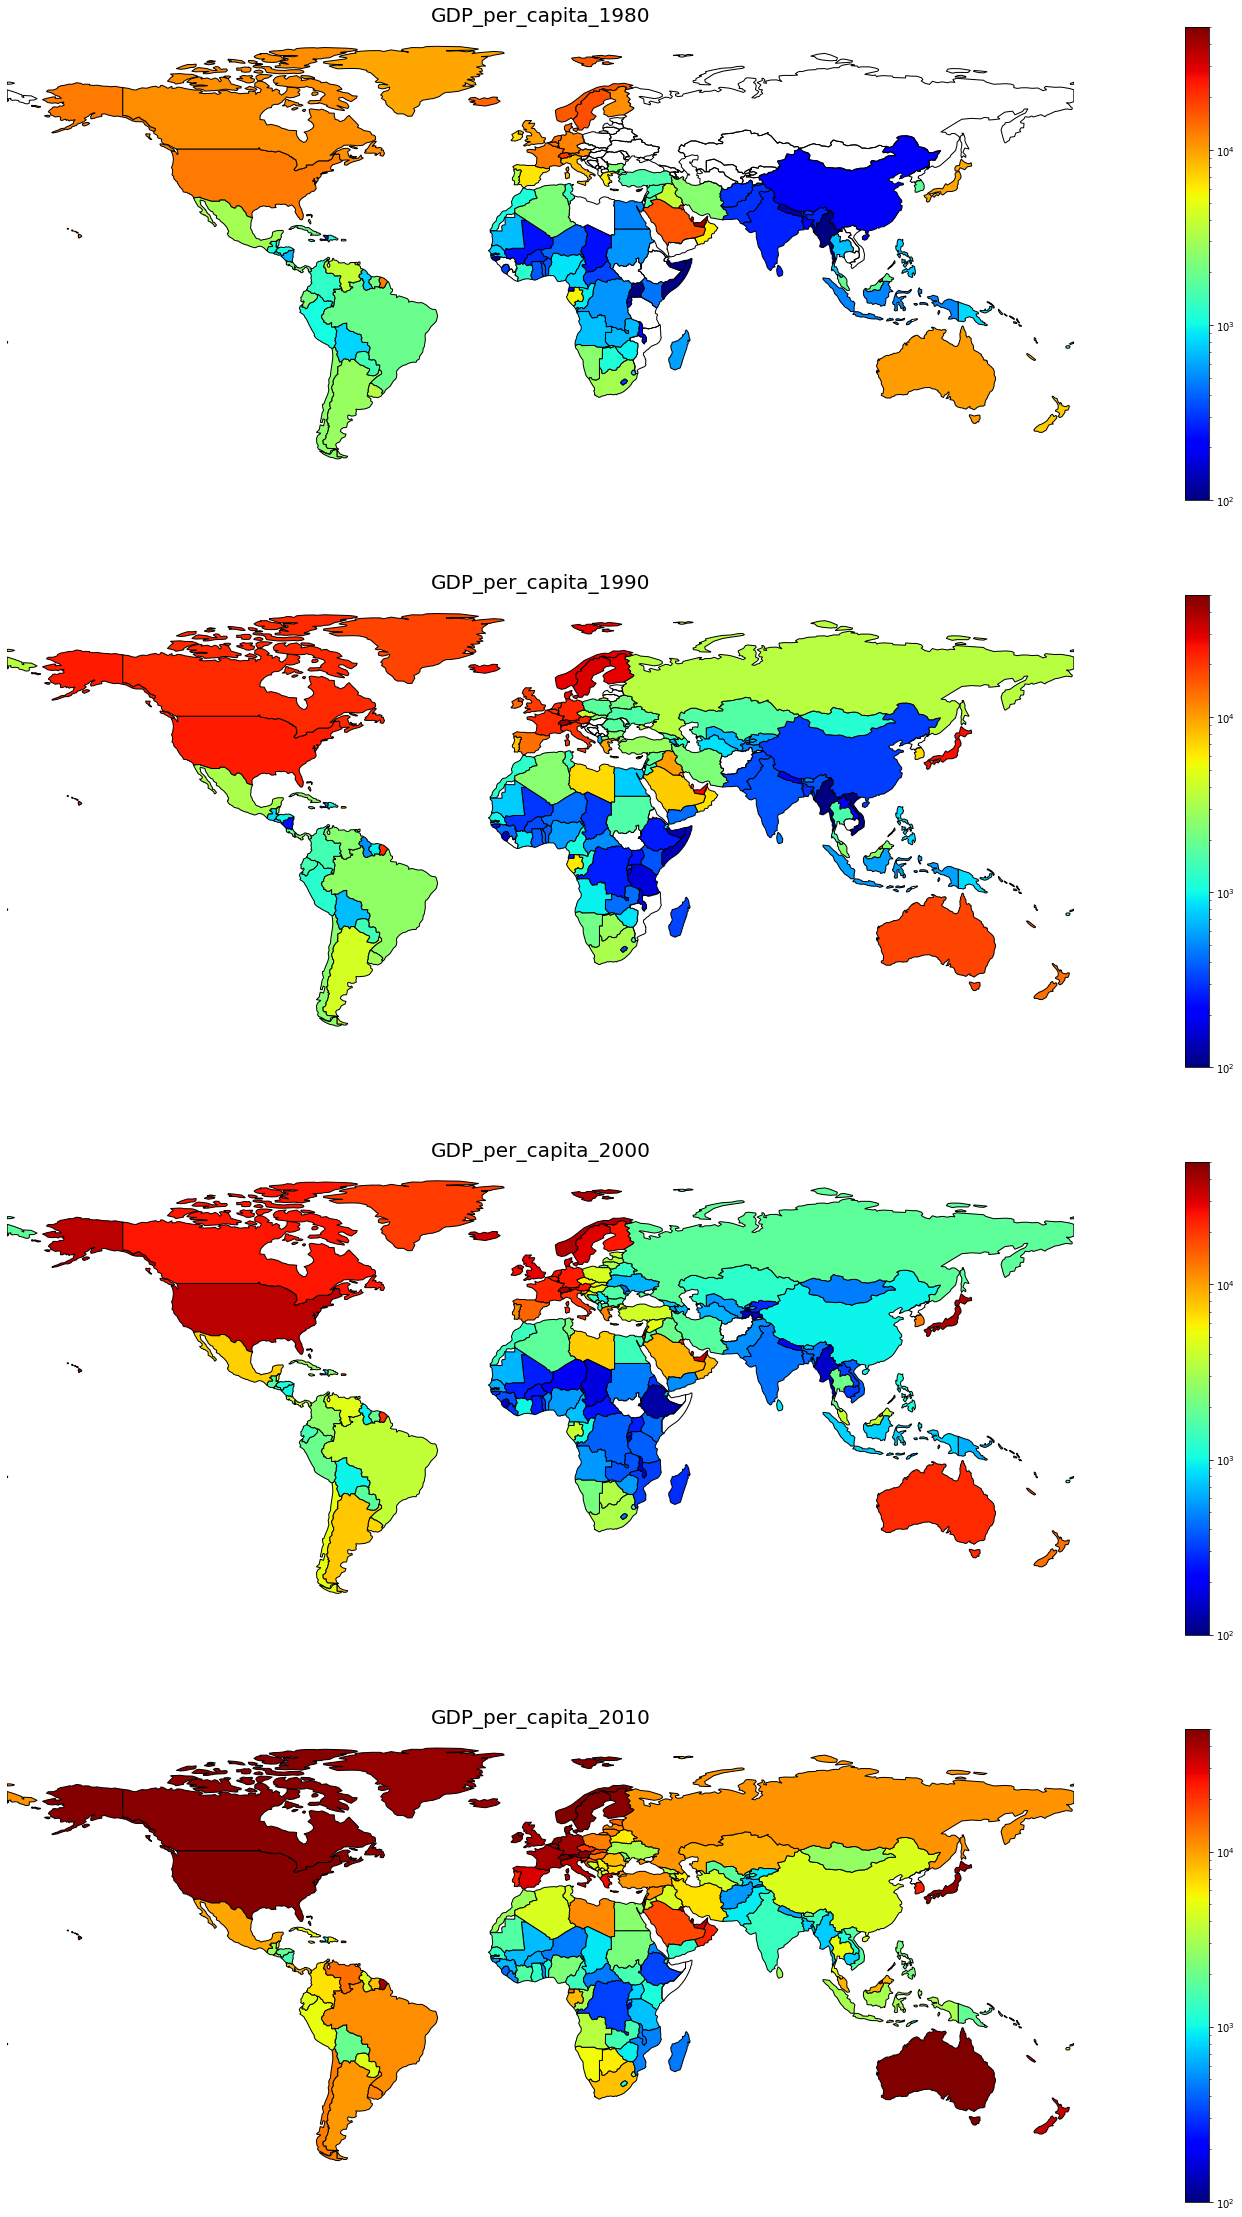

In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors

fig, ax = plt.subplots(4,1,figsize=(40,40))

for i in range(4):
    y = 1980 + i*10 
    gplt.choropleth(plotData, hue="GDP_per_capita_{}".format(y), ax=ax[i], figsize=(20,20), legend=True, cmap="jet", norm=colors.LogNorm(vmin=100, vmax=50000))
    ax[i].set_title("GDP_per_capita_{}".format(y), fontsize=20);

